In [7]:
# Implementing a U-net network on Bagls dataset.

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from natsort import natsorted



In [8]:
#getting the file directories for x=features and y=masks

data_dir = '/Users/macbookpro/Desktop/Programmings/Forschungspraktikum/Data/test'

x = []
y = []

for filename in natsorted(os.listdir(data_dir)):
    if filename.endswith('.png'):
        if not filename.endswith('_seg.png'):
            x.append(os.path.join(data_dir, filename))
        else:
            y.append(os.path.join(data_dir, filename))



In [9]:
# Load x images
x_images = []
for filename in x:
    img = Image.open(os.path.join(data_dir, filename))
    img = img.resize((256,256))
    img_arr = np.array(img)
    x_images.append(img_arr)

# Load y images
y_images = []
for filename in y:
    img = Image.open(os.path.join(data_dir, filename))
    img = img.resize((256,256))
    img_arr = np.array(img)
    y_images.append(img_arr)

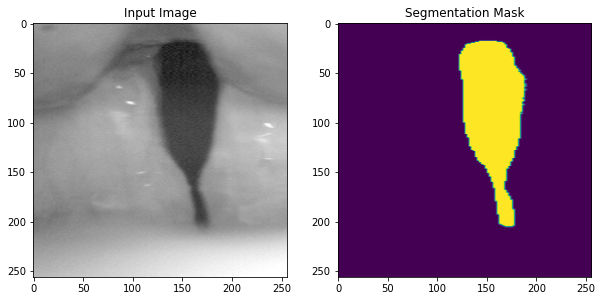

In [10]:
#example plot of x,y

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(x_images[2])
axs[0].set_title('Input Image')
axs[1].imshow(y_images[2])
axs[1].set_title('Segmentation Mask')
plt.show()

In [11]:
#spliting the data

testno = int(len(x) * (80/100)) 
valno = int(testno + len(x) * (10/100))
trainno = int(valno + len(x) * (10/100))

x_train, y_train = x_images[:testno], y_images[:testno]
x_val, y_val = x_images[testno:valno], y_images[testno:valno]
x_test, y_test = x_images[valno:trainno], y_images[valno:trainno]

# Print number of samples in each set
print('Number of samples in training set:', len(x_train))
print('Number of samples in validation set:', len(x_val))
print('Number of samples in test set:', len(x_test))

Number of samples in training set: 2800
Number of samples in validation set: 350
Number of samples in test set: 350


In [1]:
#UNet model goes here